# Case study 6 Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data = pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
#Find the missing values in the data

In [8]:
data.shape

(891, 11)

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The given data has 891 rows and 77 columns. The column Age has 177 missing values , Cabin has 687 missing values and Embarked has 2 missing values.

Checking the data types 

In [10]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Data contains integer, float and categorical values.

Checking the skewness of the data

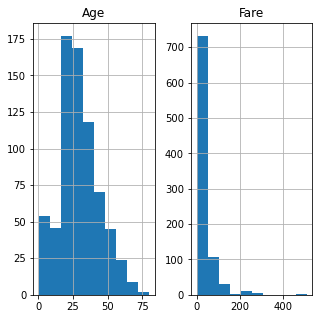

In [11]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(5,5))
plt.show()

From the histogram of age the plot is right skewed so the missing values can be replaced with the median

In [12]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

To fill the missing values in cabin and embarked we can use mode, since it is a categorical value

In [14]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)
data.Cabin.fillna(data.Cabin.mode()[0],inplace=True)

As the cabin column contains more null values than the non null values we can drop that column

In [15]:
data.drop(['Cabin'],axis=1,inplace=True)

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Find the columns in the data set

In [17]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Plotting Box plot for each column

Text(0.5, 1.0, 'Survived')

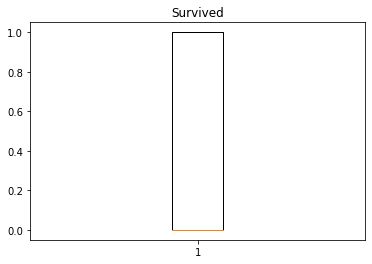

In [18]:
plt.boxplot(data['Survived'])
plt.title('Survived')

No outliers in box plot for survived

Text(0.5, 1.0, 'Pclass')

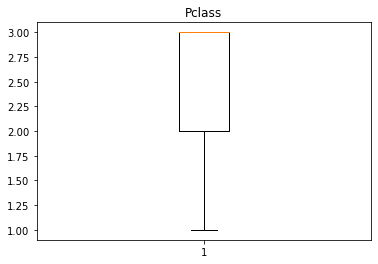

In [19]:
plt.boxplot(data['Pclass'])
plt.title('Pclass')

No outliers are present in the column of Pclass

Text(0.5, 1.0, 'Age')

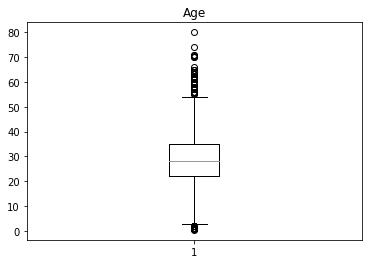

In [20]:
plt.boxplot(data['Age'])
plt.title('Age')

Outliers are present the column age

Text(0.5, 1.0, 'SibSp')

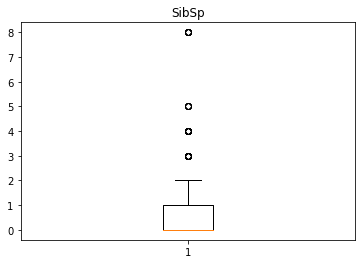

In [21]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')

Outliers are present in SibSp column

Text(0.5, 1.0, 'Parch')

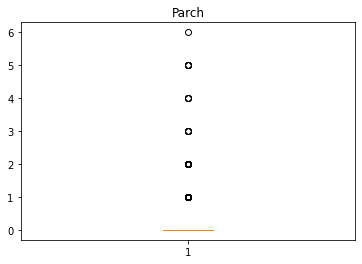

In [22]:
plt.boxplot(data['Parch'])
plt.title('Parch')

Outliers are present in Parch

Text(0.5, 1.0, 'Fare')

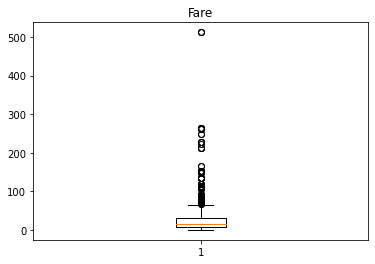

In [23]:
plt.boxplot(data['Fare'])
plt.title('Fare')

outliers are present in Fare

1. Managing outliers in Age. 
Finding Q1 Q2 Q3 and IQR to remove outliers

In [24]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1,'\n',Q2,'\n',Q3)

22.0 
 28.0 
 35.0


In [25]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR,'\n',low_limit,'\n',Up_limit)

13.0 
 2.5 
 54.5


In [26]:
outlier=[]
for x in data['Age']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [27]:
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


To locate the index of outlier

In [28]:
indx1=data['Age'][(data['Age']>Up_limit)|(data['Age']<low_limit)].index
data.loc[indx1].index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

Dropping the indices with outliers

In [29]:
data.drop([8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],inplace=True)

Text(0.5, 1.0, 'box plot of Age')

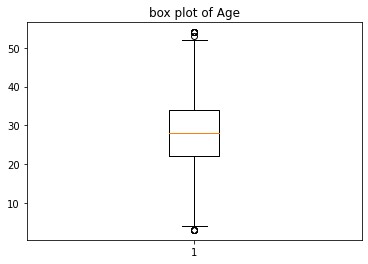

In [30]:
plt.boxplot(data['Age'])
plt.title('box plot of Age')

2. Removing Outliers from the column SibSp. Find Q1, Q2, IQR

In [31]:
Q4=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q5=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q6=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q4,'\n',Q5,'\n',Q6)

0.0 
 0.0 
 1.0


In [32]:
IQR1=Q6-Q4
low_limit1=Q4-1.5*IQR1
Up_limit1=Q6+1.5*IQR1
print(IQR1,'\n',low_limit1,'\n',Up_limit1)

1.0 
 -1.5 
 2.5


In [33]:
outlier1=[]
for y in data['SibSp']:
    if((y>Up_limit1) or (y<low_limit1)):
        outlier1.append(y)

In [34]:
print(outlier1)

[3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


Locating the index values of outliers

In [35]:
indx2=data['SibSp'][(data['SibSp']>Up_limit1)|(data['SibSp']<low_limit1)].index
data.loc[indx2].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

Dropping the outliers

In [36]:
data.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'box plot of SibSp')

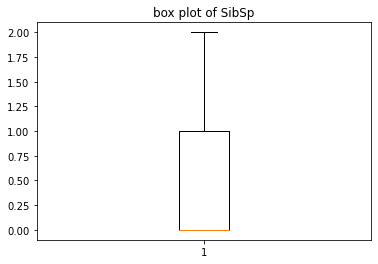

In [37]:
plt.boxplot(data['SibSp'])
plt.title('box plot of SibSp')

3. Removing outliers from Fare

In [38]:
Q7=np.percentile(data['Fare'],25,interpolation='midpoint')
Q8=np.percentile(data['Fare'],50,interpolation='midpoint')
Q9=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q7,'\n',Q8,'\n',Q9)

7.8958 
 13.0 
 27.75


In [39]:
IQR2=Q9-Q7
low_limit2=Q7-1.5*IQR2
Up_limit2=Q9+1.5*IQR2
print(IQR2,'\n',low_limit2,'\n',Up_limit2)

19.8542 
 -21.885499999999997 
 57.5313


In [40]:
outlier2=[]
for z in data['Fare']:
    if((z>Up_limit2) or (z<low_limit2)):
        outlier2.append(z)

In [41]:
print(outlier2)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


Find the outlier index values

In [42]:
indx3=data['Fare'][(data['Fare']>Up_limit2)|(data['Fare']<low_limit2)].index
data.loc[indx3].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

Dropping outliers

In [43]:
data.drop(data.loc[indx3].index,inplace=True)

Text(0.5, 1.0, 'Fare')

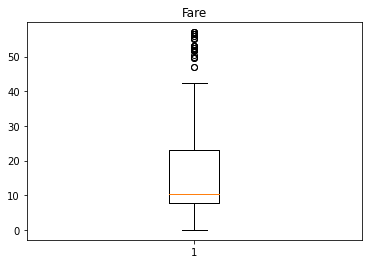

In [44]:
plt.boxplot(data['Fare'])
plt.title('Fare')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [45]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [46]:
from sklearn import preprocessing
minMax = preprocessing.MinMaxScaler(feature_range=(0,1))

In [47]:
y = data['Survived']
x = data.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_squared_error

print("MSE= ",mean_squared_error(ytest,predictions))

from sklearn.metrics import r2_score

print("R^2= ",r2_score(ytest,predictions))

MSE=  0.19622876673185494
R^2=  0.1201582124247047


In [48]:
x = data.drop(['Survived','Name','Sex','Ticket','Embarked'],axis =1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,28.612573,0.271930,0.267544,16.317275
std,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [49]:
x = minMax.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)
print("MSE=",mean_squared_error(ytest,predictions))
print("R^2",r2_score(ytest,predictions))

MSE= 0.19622876673185494
R^2 0.1201582124247047


MSE and R^2 value has no variation after scaling